# Ensemble Method: Baggging

## Libs

In [8]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

## Import database

In [6]:
df = pd.read_csv("iris_original.csv")
df.sample(5)

,Id,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Species
123,124,6.3,2.7,4.9,1.8,Iris-virginica
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
38,39,4.4,3.0,1.3,0.2,Iris-setosa


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df = df[df['Species'] != 'Iris-setosa']
df['Tipo_orquidea'] = np.where(df['Species'] == 'Iris-virginica', 1, 0)
df.head()

,Id,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Species,Tipo_orquidea
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,0
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,0
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,0
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,0
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,0


In [15]:
df['Tipo_orquidea'].unique()

array([0, 1])

## Data Prep

### Missing Values

In [17]:
df.isnull().sum()

Id                    0
comprimento_sepala    0
largura_sepala        0
comprimento_petala    0
largura_petala        0
Species               0
Tipo_orquidea         0
dtype: int64

### Duplications

In [18]:
df.duplicated().sum()

0

### Variables Types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  100 non-null    int64  
 1   comprimento_sepala  100 non-null    float64
 2   largura_sepala      100 non-null    float64
 3   comprimento_petala  100 non-null    float64
 4   largura_petala      100 non-null    float64
 5   Species             100 non-null    object 
 6   Tipo_orquidea       100 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 5.9+ KB


## Exploratory Data Analysis

### Scatter by Class

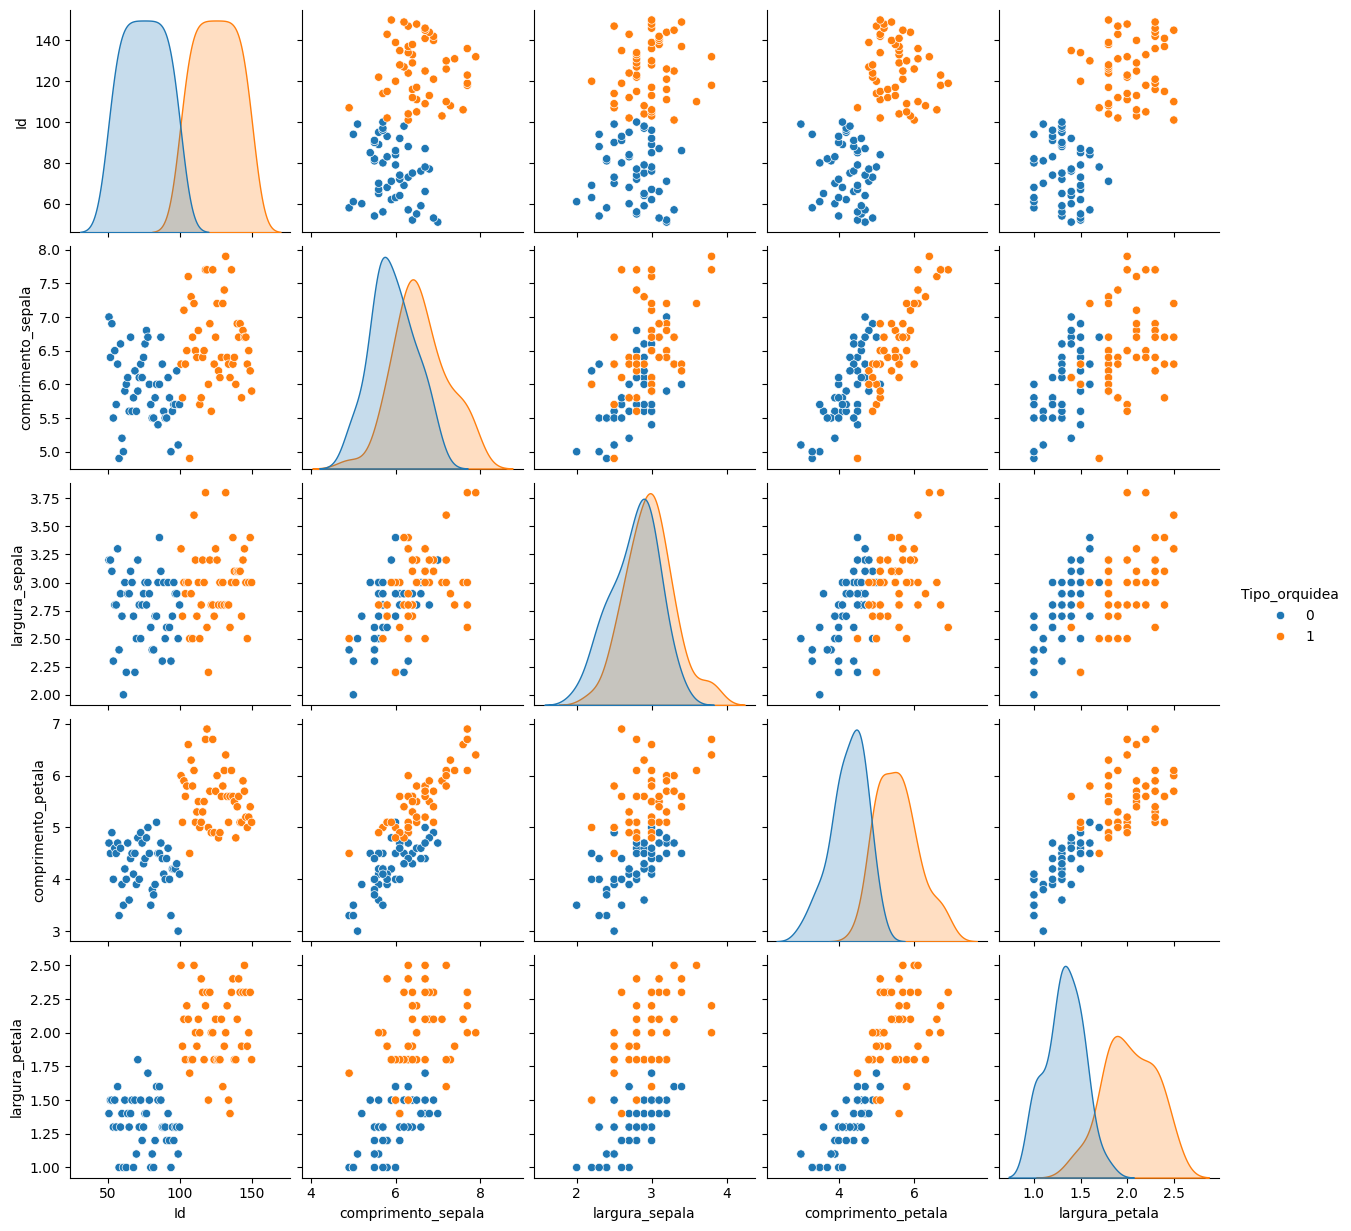

In [20]:
sns.pairplot(df, hue='Tipo_orquidea')

## Models

## Target and Features

In [22]:
y = df['Tipo_orquidea']
X = df[['comprimento_sepala', 'largura_sepala']]

In [23]:
y.head()

50    0
51    0
52    0
53    0
54    0
Name: Tipo_orquidea, dtype: int32

In [24]:
X.head()

,comprimento_sepala,largura_sepala
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
53,5.5,2.3
54,6.5,2.8


## Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.30, 
                                        random_state=42)

In [29]:
X_train.shape

(70, 2)

In [30]:
X_test.shape

(30, 2)

## Ensemble Method: Bagging

In [31]:
base_model = LogisticRegression(max_iter=1000)

estimators = 100

bagging_model = BaggingClassifier(base_estimator=base_model,
                                    n_estimators = estimators,
                                    max_samples=0.5,
                                    max_features=0.5,
                                    random_state=42)

In [32]:
bagging_model.fit(X, y)

C:\Users\lg070\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000),
                  max_features=0.5, max_samples=0.5, n_estimators=100,
                  random_state=42)

In [48]:
import preditiva

preditiva.calculates_performance(bagging_model, X_train, y_train, X_test, y_test)

,Treino,Teste,Variação
Acurácia,0.757143,0.633333,-0.16
AUROC,0.771499,0.807692,0.05
Precision,0.763158,0.600000,-0.21
Recall,0.783784,0.461538,-0.41
F1,0.773333,0.521739,-0.33


## Ensemble Method: Bagging Random Forest

In [49]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  min_samples_leaf=10,
                                  max_depth=3,
                                  random_state=42)

rf_model.fit(X_train, y_train)

preditiva.calculates_performance(rf_model, X_train, y_train, X_test, y_test)

,Treino,Teste,Variação
Acurácia,0.771429,0.600000,-0.22
AUROC,0.810401,0.764706,-0.06
Precision,0.783784,0.555556,-0.29
Recall,0.783784,0.384615,-0.51
F1,0.783784,0.454545,-0.42
